<a href="https://colab.research.google.com/github/sokistar24/msc_project/blob/master/lane_detection_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text(0.5, 1.0, ' Division of ROI ')

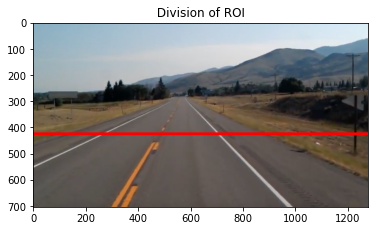

In [ ]:
import cv2 # open cv
import numpy as np
import matplotlib.pyplot as plt
img_original=cv2.imread("DATA/test_image.jpg")
img= cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)
lane_img=np.copy(img)
gray = cv2.cvtColor(lane_img, cv2.COLOR_RGB2GRAY)
kernel = 5
blur = cv2.GaussianBlur(gray, (kernel, kernel), 0)
cv2.line(img,(0,425),(1400,425),(255,0,0),10)
canny = cv2.Canny(gray, 50, 150)
plt.imshow(img,cmap='gray')
plt.title(" Division of ROI ")
#plt.axis('off')

Text(0.5, 1.0, 'Image with Edges')

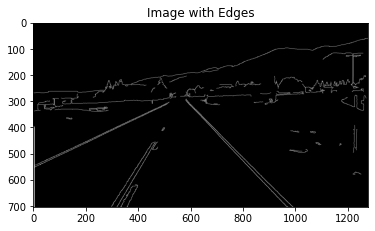

In [ ]:
def canny_func(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    kernel = 5
    blur = cv2.GaussianBlur(gray,(kernel, kernel),0.5)
    canny = cv2.Canny(gray, 50, 150)
    return canny
canny=canny_func(lane_img)
cv2.line(canny,(0,400),(0,1400),(255,0,0),10)
plt.imshow(canny,cmap='gray')
plt.title("Image with Edges")
#plt.axis('off')

In [ ]:
def make_points(image, line):
    slope, intercept = line
    y1 = int(image.shape[0])# bottom of the image
    y2 = int(y1*3/5)         # slightly lower than the middle
    x1 = int((y1 - intercept)/slope)
    x2 = int((y2 - intercept)/slope)
    return [[x1, y1, x2, y2]]

In [ ]:
def average_slope_intercept(image, lines):
    left_fit    = []
    right_fit   = []
    if lines is None:
        return None
    for line in lines:
        for x1, y1, x2, y2 in line:
            fit = np.polyfit((x1,x2), (y1,y2), 1)
            slope = fit[0]
            intercept = fit[1]
            if slope < 0: # y is reversed in image
                left_fit.append((slope, intercept))
            else:
                right_fit.append((slope, intercept))
    # add more weight to longer lines
    left_fit_average  = np.average(left_fit, axis=0)
    right_fit_average = np.average(right_fit, axis=0)
    left_line  = make_points(image, left_fit_average)
    right_line = make_points(image, right_fit_average)
    averaged_lines = [left_line, right_line]
    return averaged_lines

In [ ]:
def region_of_interest(image):
    height,width=image.shape
    traingle=np.array([[ (200, height),(550, 250),(1100, height)]])
    mask=np.zeros_like(image)
    cv2.fillPoly(mask, traingle, 255)
    masked_image=cv2.bitwise_and(image,mask)
    return masked_image
def display_lines(img,lines):
    line_image = np.zeros_like(img)
    if lines is not None:
        for line in lines:
            for x1, y1, x2, y2 in line:
                cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)
    return line_image


(-0.5, 1278.5, 703.5, -0.5)

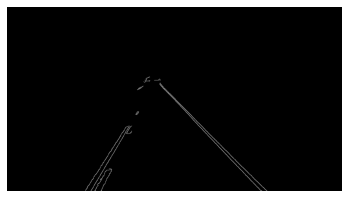

In [ ]:
canny=canny_func(lane_img)
roi=region_of_interest(canny)
plt.imshow(roi,cmap='gray')
plt.axis('off')

Text(0.5, 1.0, 'Orignial Hough line ')

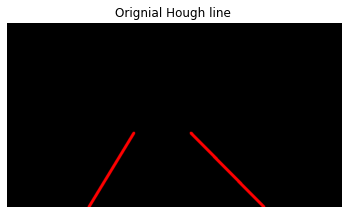

In [ ]:
lines = cv2.HoughLinesP(roi, 2, np.pi/180, 100, np.array([]), minLineLength=20,maxLineGap=2)
average_line=average_slope_intercept(lane_img, lines)
line_image=display_lines(lane_img,average_line)
plt.imshow(line_image)
plt.axis('off')
plt.title("Orignial Hough line ")

Text(0.5, 1.0, 'Modified hough transform')

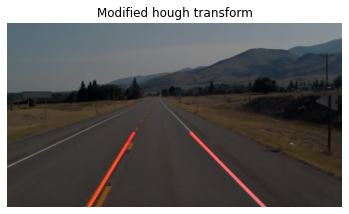

In [ ]:
blended_img=cv2.addWeighted(lane_img,0.6,line_image,0.9,1)
plt.imshow(blended_img,cmap='gray')
plt.axis('off')
plt.title("Modified hough transform")